In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df.shape

(49068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df.rename(columns={'Province/State':'state','Country/Region':'country'},inplace=True)

In [ ]:
df.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.Date.value_counts()

,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


In [ ]:
df.Date.max()

'2020-07-27'

In [ ]:
top = df[df['Date'] == '2020-07-27']
top.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


In [ ]:
top.groupby(by='country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

,country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [ ]:
Confirmed = df.groupby(by='Date')['Confirmed'].sum().reset_index()

In [ ]:
Confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [ ]:
Confirmed.tail()

,Date,Confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [ ]:
df.groupby(by='Active')['Confirmed'].sum().reset_index()

,Active,Confirmed
0,-14,560
1,-13,1120
2,-10,560
3,-6,1512
4,-4,558
...,...,...
8636,2661117,4038816
8637,2705347,4112531
8638,2753091,4178970
8639,2789125,4233923


In [ ]:
df.groupby(by='Deaths')['Confirmed'].sum().reset_index()

,Deaths,Confirmed
0,0,683807
1,1,723450
2,2,397755
3,3,458854
4,4,518298
...,...,...
3635,144430,4038816
3636,145560,4112531
3637,146465,4178970
3638,146935,4233923


In [ ]:
df.groupby(by='Recovered')['Confirmed'].sum().reset_index()

,Recovered,Confirmed
0,0,45634339
1,1,108860
2,2,44254
3,3,41286
4,4,106531
...,...,...
7604,1620313,2287475
7605,1693214,2343366
7606,1785359,2394513
7607,1812913,2419091


In [ ]:
Confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


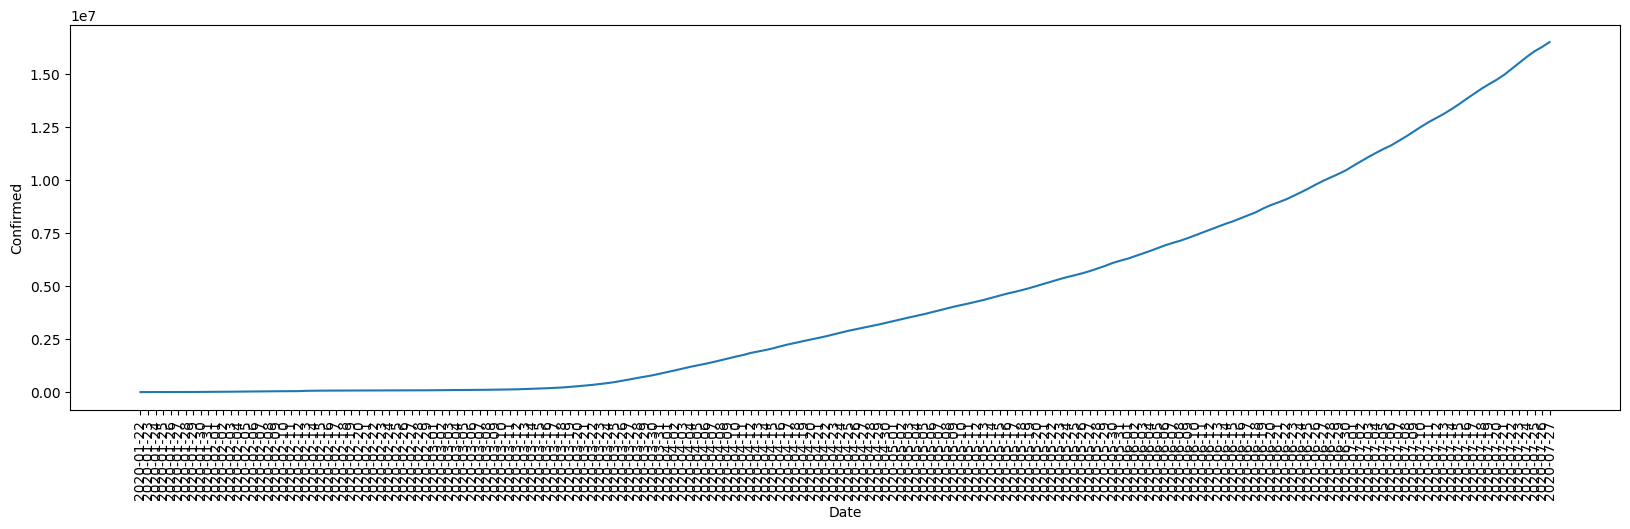

In [ ]:
plt.figure(figsize = (20,5))
sns.lineplot(data = Confirmed,x='Date' , y='Confirmed')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
top_10_Recovered = df.groupby(by='country')['Recovered'].sum().sort_values(ascending=False).head(10)

In [ ]:
top_10_Recovered

,Recovered
country,
US,56353416
Brazil,54492873
Russia,25120448
India,23783720
Germany,17107839
Italy,15673910
Iran,15200895
Spain,15093583
Turkey,13345389


In [ ]:
top_10_Deaths = df.groupby(by='country')['Deaths'].sum().sort_values(ascending=False).head(10)
top_10_Deaths

,Deaths
country,
US,11011411
United Kingdom,3997775
Brazil,3938034
Italy,3707717
France,3048524
Spain,3033030
Mexico,1728277
India,1111831
Iran,1024136


In [ ]:
top_10_Confirmed = df.groupby(by='country')['Confirmed'].sum().sort_values(ascending=False).head(10)
top_10_Confirmed

,Confirmed
country,
US,224345948
Brazil,89524967
Russia,45408411
India,40883464
Spain,27404045
United Kingdom,26748587
Italy,26745145
France,21210926
Germany,21059152


In [ ]:
top_10_Active = df.groupby(by='country')['Active'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_Active

,country,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


In [ ]:
US = df[df['country'] == 'US']
US.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas


In [ ]:
India = df[df['country'] == 'US']
India.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas


In [ ]:
Russia = df[df['country'] == 'US']
Russia.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas


In [ ]:
France = df[df['country'] == 'US']
France.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas


In [ ]:
Brazil = df[df['country'] == 'US']
Brazil.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas


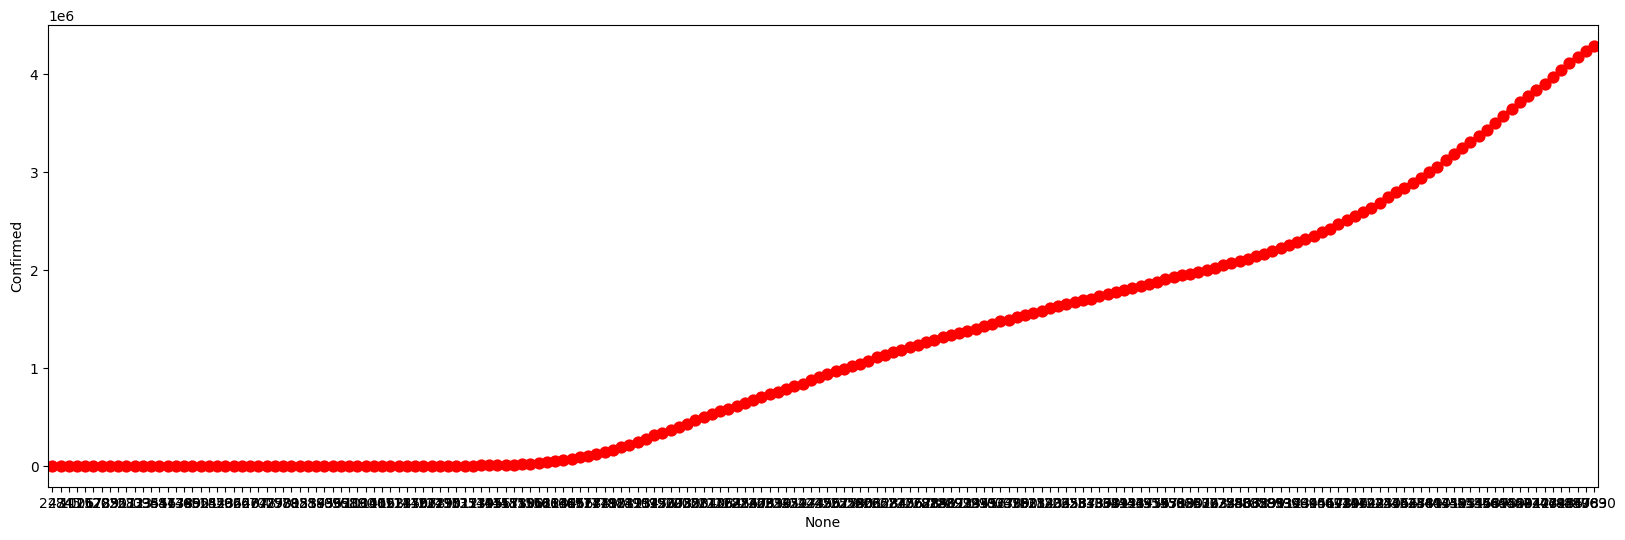

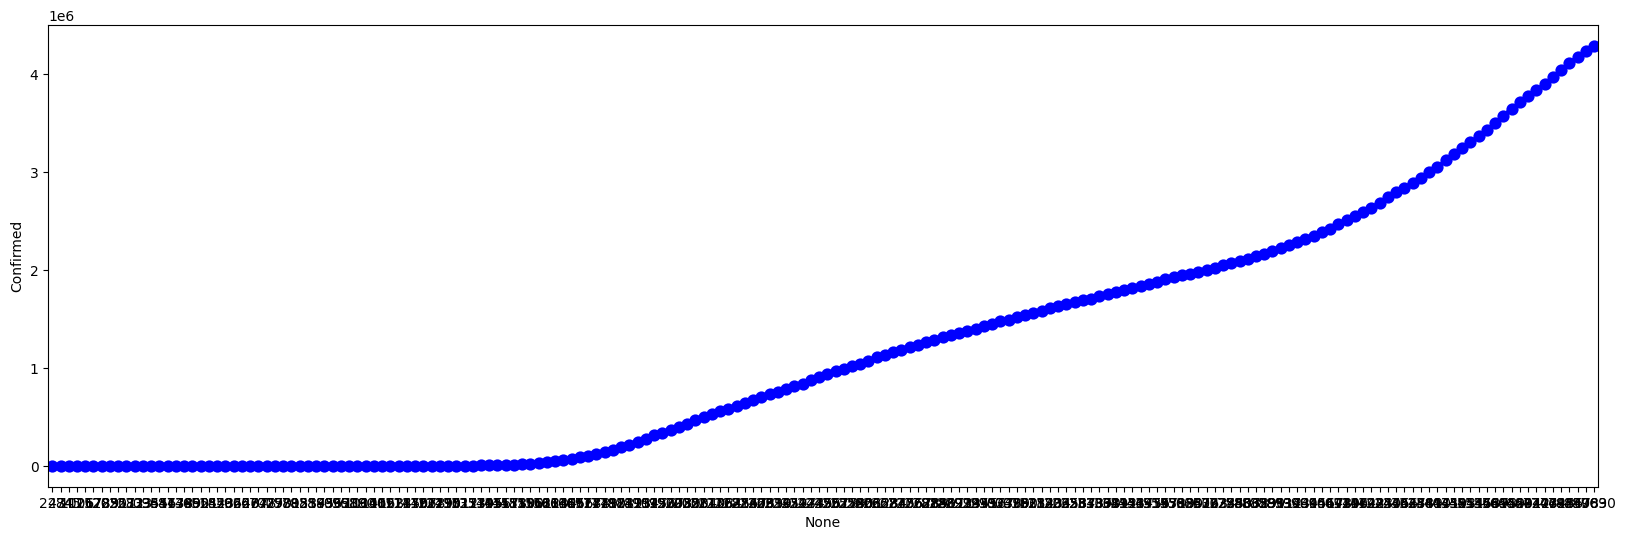

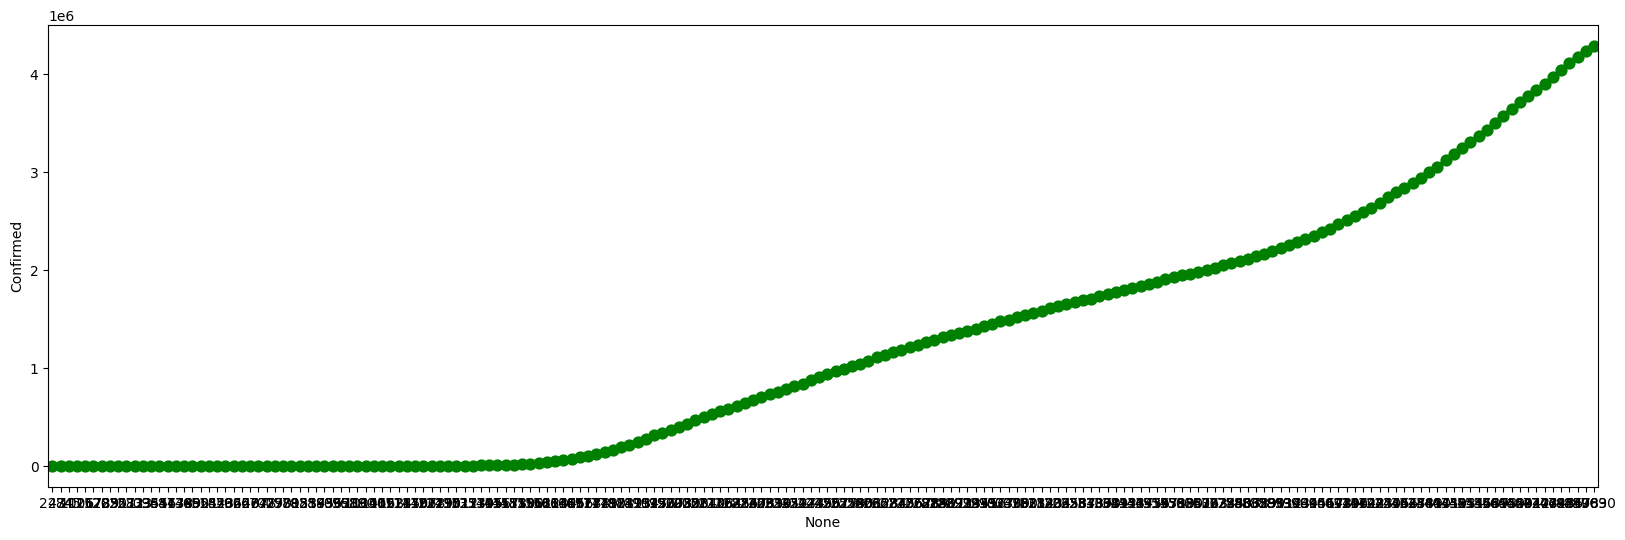

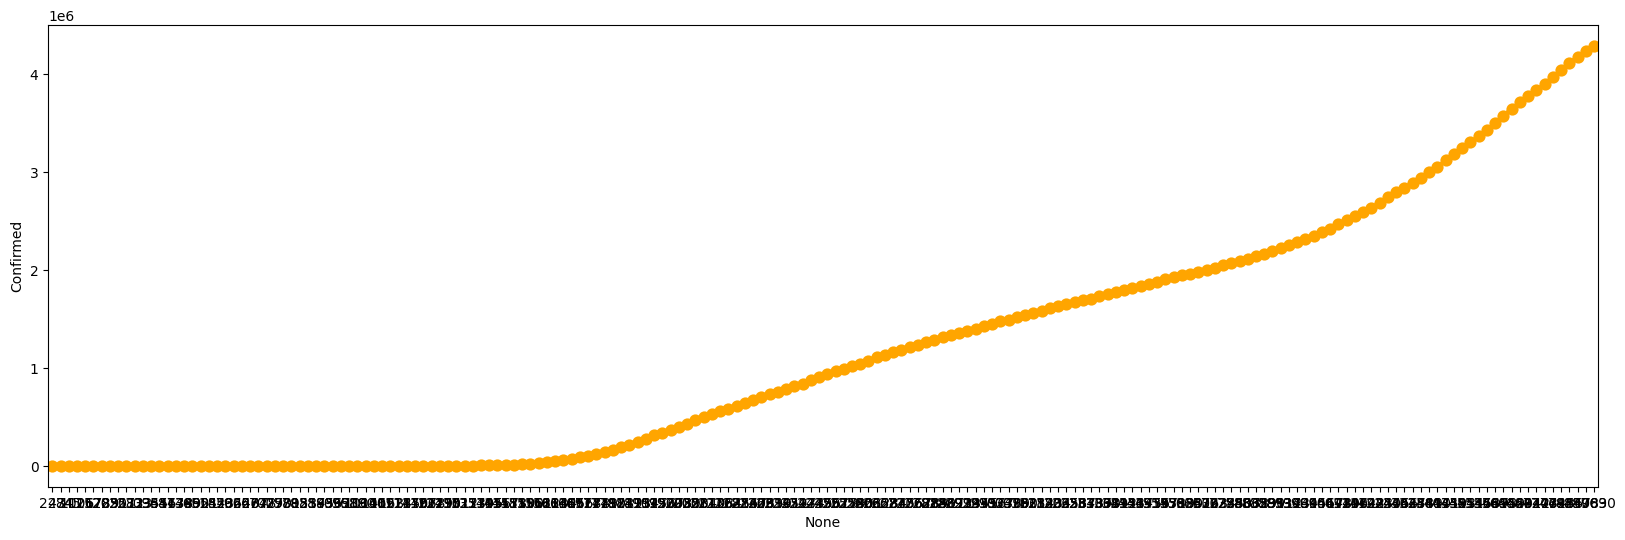

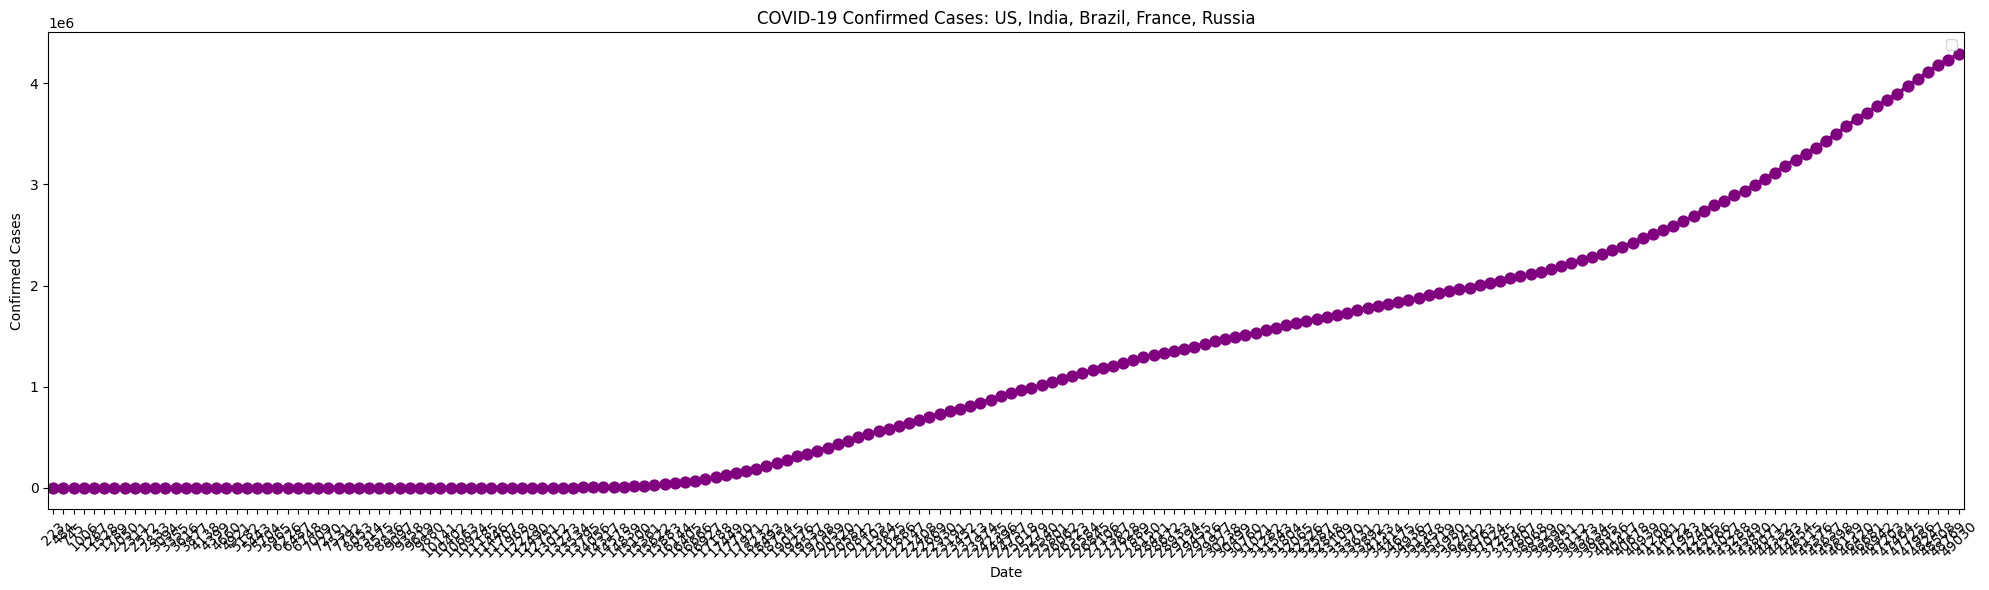

In [ ]:
plt.figure(figsize=(20, 6))
sns.pointplot(data = US,x=US.index,y=US.Confirmed,color='red')
plt.show()
plt.figure(figsize=(20, 6))
sns.pointplot(data = India,x=India.index,y=India.Confirmed,color='Blue')
plt.show()
plt.figure(figsize=(20, 6))
sns.pointplot(data = Brazil,x=Brazil.index,y=Brazil.Confirmed,color='green')
plt.show()
plt.figure(figsize=(20, 6))
sns.pointplot(data = France,x=France.index,y=France.Confirmed,color='Orange')
plt.show()
plt.figure(figsize=(20, 6))
sns.pointplot(data = Russia,x=Russia.index,y=Russia.Confirmed,color='Purple')
plt.title("COVID-19 Confirmed Cases: US, India, Brazil, France, Russia")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
!pip install prophet

In [ ]:
df1 = pd.read_csv('/content/covid_19_clean_complete.csv')


In [ ]:
confirmed = df1.groupby(by='Date').sum()['Confirmed'].reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
confirmed.columns =['ds','y']
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [ ]:
from prophet import Prophet
m = Prophet()

In [ ]:
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp41db59xs/t3vcp05c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp41db59xs/z8wolh_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16441', 'data', 'file=/tmp/tmp41db59xs/t3vcp05c.json', 'init=/tmp/tmp41db59xs/z8wolh_b.json', 'output', 'file=/tmp/tmp41db59xs/prophet_modelfyhees9f/prophet_model-20250726141152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.207365e+05,7.702817e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.128981e+05,9.813303e+04,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-1.092741e+05,1.095560e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.786228e+04,1.221355e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-1.022247e+05,1.129350e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.663036e+07,1.684995e+07,1.674003e+07,1.675049e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.684795e+07,1.706461e+07,1.693825e+07,1.695957e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.705593e+07,1.728614e+07,1.713496e+07,1.717244e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.725485e+07,1.747107e+07,1.732900e+07,1.738492e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [ ]:
forecast[['ds','yhat','yhat_upper','yhat_lower']]

,ds,yhat,yhat_upper,yhat_lower
0,2020-01-22,-2.067684e+04,7.702817e+04,-1.207365e+05
1,2020-01-23,-8.050948e+03,9.813303e+04,-1.128981e+05
2,2020-01-24,5.827455e+03,1.095560e+05,-1.092741e+05
3,2020-01-25,1.217668e+04,1.221355e+05,-9.786228e+04
4,2020-01-26,8.405020e+03,1.129350e+05,-1.022247e+05
...,...,...,...,...
190,2020-07-30,1.674391e+07,1.684995e+07,1.663036e+07
191,2020-07-31,1.695910e+07,1.706461e+07,1.684795e+07
192,2020-08-01,1.716676e+07,1.728614e+07,1.705593e+07
193,2020-08-02,1.736430e+07,1.747107e+07,1.725485e+07


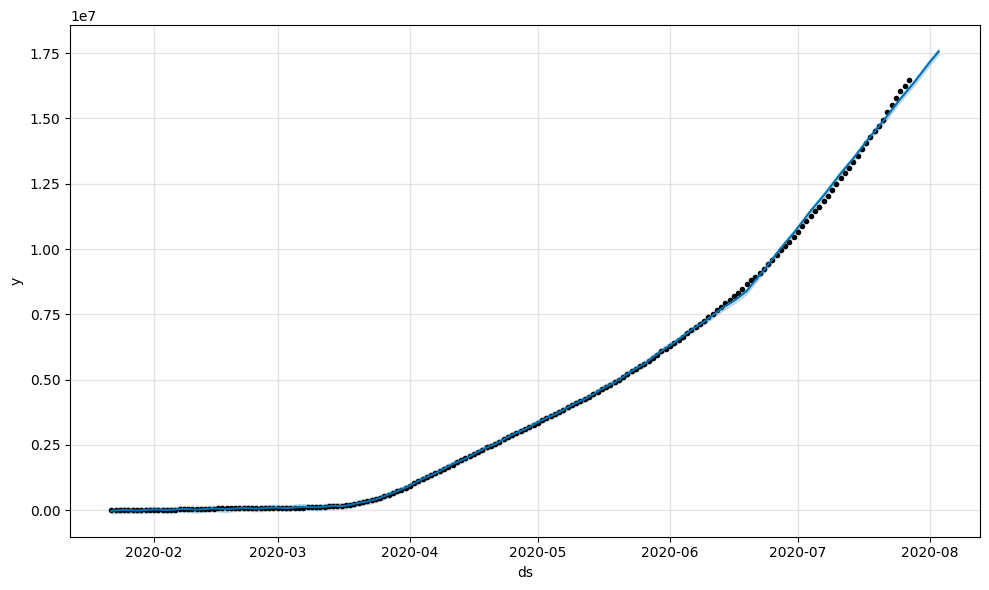

In [ ]:
m.plot(forecast)
plt.show()

In [ ]:
import plotly
import plotly.express as px

In [ ]:
df1.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
world = df1.groupby(by='Country/Region')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

In [ ]:
world

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


In [ ]:
import plotly.express as px

fig = px.choropleth(
    world,
    locations='Country/Region',
    locationmode='country names',
    color='Active',
    hover_name='Country/Region',
    range_color=(1, 20000),
    color_continuous_scale='reds',
    title='Countries with Active Cases'
)

fig.show()


In [ ]:
import plotly.express as px

fig = px.choropleth(
    world,
    locations='Country/Region',
    locationmode='country names',
    color='Deaths',
    hover_name='Country/Region',
    range_color=(1, 20000),
    color_continuous_scale='reds',
    title='Countries with Deaths Cases'
)

fig.show()


In [ ]:
india_data = world[world['Country/Region'] == 'India']
print(india_data)


   Country/Region  Confirmed   Deaths  Recovered    Active
79          India   40883464  1111831   23783720  15987913


In [ ]:
print(india_data[['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']])


   Country/Region  Confirmed   Deaths  Recovered    Active
79          India   40883464  1111831   23783720  15987913


In [ ]:
deaths_in_india = india_data['Deaths'].values[0]
print("Total deaths in India:", deaths_in_india)


Total deaths in India: 1111831


In [ ]:
fig = px.choropleth(
    india_data,
    locations='Country/Region',
    locationmode='country names',
    color='Deaths',
    hover_name='Country/Region',
    range_color=(1, 20000),
    color_continuous_scale='reds',
    title='COVID-19 Deaths in India'
)

fig.show()
